<div style="text-align: right">ADEC7430 Lecture 2</div>
<div style="text-align: right">Prof. Stefano Parravano, 09/02/20225</div>

## OLS Example Problem

Given the data: $(x_i,y_i)$: (2,1),(5,2),(7,3),(8,3).

Find a linear model of the form:

$$ y = \beta_0 + \beta_1 x $$

that fits the data provided. Use OLS.

Step 1: Create the design matrix

$$ X = \begin{bmatrix} 1 & 2 \\ 1 & 5 \\ 1 & 7 \\ 1 & 8 \end{bmatrix}$$

Step 2: take note of the observation vector and the parameter vector.

parameter vector:
$$\vec{\beta} = \begin{bmatrix} \ \beta_0 \\ \beta_1 \end{bmatrix} $$

observation vector:
$$\vec{y} = \begin{bmatrix} \ 1 \\ 2 \\ 3 \\ 3 \end{bmatrix} $$

Step 3: Express the problem in the language of matrix alegebra:

$$ X\vec{\beta} = \vec{y} $$

Step 4: Use normal equations to solve for $\hat{\beta}$

$$ X^TX\hat{\beta} = X^T\vec{y} $$

$$\implies$$

$$ \hat{\beta} = (X^TX)^{-1} X^T\vec{y} $$

Step 5: Use python to perform the computation. This is what you will have to figure out :). PLease use the sympy package to perform operations between matrices and vectors.

Step 6: Report your result.

$$ \hat{\beta} = \begin{bmatrix} \ \frac{2}{7} \\ \frac{5}{14} \end{bmatrix} $$

$$ \therefore y = \frac{2}{7} + \frac{5}{14} x $$

## Assignment:

Given the data provided below: x_feature et y_feature please fit a function of the form: $$ f(x) = ax^2 + bx + c $$  
where:  
$$ (a,b,c) \in \mathbf{R}$$  
and of course let's not forget:  
$$ a \neq 0 $$  

Use OLS and do not use a package to estimate the unknown parameters $\hat\beta$ (a,b,c).

You must follow the step by step outlined in the example problem above.

In addition, you are required to:
 + compute the residual vector: $\epsilon = \vec{y} - X \hat{\beta}$
 + compute the norm of the residual vector (what does this represent)? Provide a description in plain english.
 + plot your data and the best fit line you estimated.
 + Compute the RMSE and compare it against the RMSE reported in the OLS_gradientDescent notebook (model was fit on the same data using Gradient Descent as opposed to the closed form solution). Are the estimates different? Comment on this.
 

You may notice that in te OLS_gradientDescent notebook the features are normalized before the training process.

Please perform the model fitting (training) using non-normalized features first and then repeat the entire process using normalized features. Take note of the differences and provide meaningful commentary.

NOTE: I provide the function to normalize a feature vector.

As a Final Step: Use R or any software/language of your choosing to perform OLS regression on the sample dataset provided. Do you get the same resutls?

## Solution

In [20]:
from sympy import *
import matplotlib.pyplot as plt
import numpy as np

In [12]:
def normalize_tensor_0_1(tensor):
    min_ten=min(tensor)
    max_ten=max(tensor)
    norm_ten=(tensor - min_ten)/(max_ten-min_ten)
    return(norm_ten)

In [26]:
y = Matrix([[7.3],[15.1],[17.2],[61.9],[12.3],[8],[11.6],[22.5],[6],[16.6],[32.2]])
x_feature = np.asarray([35.7,55.9,58.2,81.9,56.3,48.9,33.9,21.8,48.4,60.4,68.4])
y_feature = np.asarray([y[x] for x in range(y.shape[0])])


[7.30000000000000 15.1000000000000 17.2000000000000 61.9000000000000
 12.3000000000000 8 11.6000000000000 22.5000000000000 6 16.6000000000000
 32.2000000000000]


In [28]:
X = np.vstack([x_feature**2, x_feature , np.ones(len(x_feature))]).T
y = y_feature.reshape(-1,1)
print(y)

[[7.30000000000000]
 [15.1000000000000]
 [17.2000000000000]
 [61.9000000000000]
 [12.3000000000000]
 [8]
 [11.6000000000000]
 [22.5000000000000]
 [6]
 [16.6000000000000]
 [32.2000000000000]]


In [53]:
b = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
a,b,c = b.flatten()
print("a =", a, "b =", b, "c =", c)


a = 0.0361959753727332 b = -3.08939325442392 c = 72.7400574684363


In [31]:
y_hat = X.dot(b)
print(y_hat)

[[8.58012693829703]
 [13.1485203506095]
 [15.5418256825009]
 [62.5072363010161]
 [13.5372384235682]
 [8.22090559813988]
 [9.60640300156406]
 [22.5930598581325]
 [8.00466802346835]
 [18.1894144170218]
 [30.7706014056947]]


In [32]:
resid = y - y_hat
print(resid)

[[-1.28012693829703]
 [1.95147964939050]
 [1.65817431749914]
 [-0.607236301016108]
 [-1.23723842356818]
 [-0.220905598139879]
 [1.99359699843594]
 [-0.0930598581325341]
 [-2.00466802346835]
 [-1.58941441702175]
 [1.42939859430530]]


In [37]:
resid_squared = resid**2
mean_resid_sq = np.mean(resid_squared)
rmse = mean_resid_sq ** 0.5
print(rmse)

1.43704354134044


In [38]:
x_normal = normalize_tensor_0_1(x_feature)

In [39]:
X_norm = np.vstack([x_normal**2, x_normal , np.ones(len(x_normal))]).T

In [56]:
b_norm = np.linalg.inv(X_norm.T.dot(X_norm)).dot(X_norm.T).dot(y)
a_norm,b_norm,c_norm = b_norm.flatten()
print("a =", a_norm, "b =", b_norm, "c =", c_norm)


a = 130.740225006063 b = -90.8260485631824 c = 22.5930598581321


In [42]:
y_hat_norm = X_norm.dot(b_norm)

In [43]:
resid_norm = y - y_hat_norm

In [44]:
resid_squared_norm = resid_norm**2
mean_resid_sq_norm = np.mean(resid_squared_norm)
rmse_norm = mean_resid_sq_norm ** 0.5
print(rmse_norm)

1.43704354134044


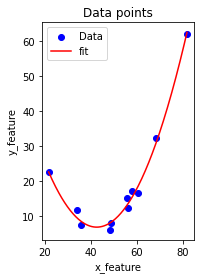

In [55]:
plt.scatter(x_feature, y_feature, color="blue", label="Data")
x_range = np.linspace(min(x_feature), max(x_feature), 200)
y_range = a*x_range**2 + b*x_range + c
plt.plot(x_range, y_range, color="red", label="fit")
plt.title("Data points")
plt.xlabel("x_feature"); plt.ylabel("y_feature")
plt.legend()

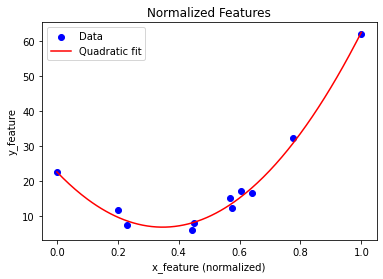

In [60]:
plt.scatter(x_normal, y_feature, color="blue", label="Data")
x_range_norm = np.linspace(min(x_normal), max(x_normal), 200)
y_range_norm = a_norm*x_range_norm**2 + b_norm*x_range_norm + c_norm
plt.plot(x_range_norm, y_range_norm, color="red", label="fit")
plt.title("Normalized Features")
plt.xlabel("x_feature (normalized)"); plt.ylabel("y_feature")
plt.legend()